In [1]:
import numpy as np  # type: ignore
import pandas as pd  # type: ignore

import fiona  # type: ignore
from fiona.crs import from_epsg # type: ignore
import geopandas as gpd  # type: ignore
import shapely # type: ignore
from shapely.geometry import Point

import matplotlib.pyplot as plt  # type: ignore
import seaborn as sns  # type: ignore


%matplotlib inline

In [2]:
#Read EstSoil-EH

estsoil_12c = "Data\EstSoil-EH_v1.2c.shp\EstSoil-EH_v1.2c.shp"
data = gpd.read_file(estsoil_12c,encoding='utf-8')
display(data.head())

,orig_fid,est_soilty,wrb_code,wrb_main,est_txcode,nlayers,zmx,z1,est_txt1,lxtype1,...,grassland_,area_wetla,wetland_pc,area_urban,urban_pct,area_water,water_pct,area_other,other_pct,geometry
0,0,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,...,0.000000,0.0,0.0,0.000000,0.000000,0.066504,0.003678,1808.194742,99.996322,"POLYGON ((698614.390 6447795.940, 698612.523 6..."
1,1,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((668432.067 6543565.911, 668425.630 6..."
2,2,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,...,71.058156,0.0,0.0,386.624055,14.876251,359.077009,13.816315,0.000000,0.000000,"POLYGON ((668550.130 6543573.200, 668543.495 6..."
3,3,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,...,66.551261,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((679817.320 6545854.050, 679829.522 6..."
4,4,Ag,FL-gln,FL,l,1.0,1000.0,1000.0,l,S,...,98.280958,0.0,0.0,0.000000,0.000000,28.399424,1.719042,0.000000,0.000000,"POLYGON ((677362.640 6546501.230, 677345.370 6..."


In [3]:
#Drop soc1 soc2 soc3 soc4 values
no_soc_data = data.drop(["soc1","soc2","soc3","soc4"],axis=1)
no_soc_data.columns

Index(['orig_fid', 'est_soilty', 'wrb_code', 'wrb_main', 'est_txcode',
       'nlayers', 'zmx', 'z1', 'est_txt1', 'lxtype1', 'est_crs1', 'sand1',
       'silt1', 'clay1', 'rock1', 'bd1', 'k1', 'awc1', 'z2', 'est_txt2',
       'lxtype2', 'est_crs2', 'sand2', 'silt2', 'clay2', 'rock2', 'bd2', 'k2',
       'awc2', 'z3', 'est_txt3', 'lxtype3', 'est_crs3', 'sand3', 'silt3',
       'clay3', 'rock3', 'bd3', 'k3', 'awc3', 'z4', 'est_txt4', 'lxtype4',
       'est_crs4', 'sand4', 'silt4', 'clay4', 'rock4', 'bd4', 'k4', 'awc4',
       'unit_area', 'tri_mean', 'tri_stdev', 'tri_median', 'twi_mean',
       'twi_stdev', 'twi_median', 'slp_mean', 'slp_stdev', 'slp_median',
       'ls_mean', 'ls_stdev', 'ls_median', 'area_drain', 'drain_pct',
       'area_arabl', 'arable_pct', 'area_fores', 'forest_pct', 'area_grass',
       'grassland_', 'area_wetla', 'wetland_pc', 'area_urban', 'urban_pct',
       'area_water', 'water_pct', 'area_other', 'other_pct', 'geometry'],
      dtype='object')

In [4]:
#Drop all unnecessary columns(ones which are calculated based on previous SOC data and the ones which are already exist in soc_samples data)
#before joining to soc_samples data


sorted_data = no_soc_data.drop(['wrb_code',  'est_crs1', 'bd1', 'est_txt2', 'lxtype2', 
                    'est_crs2','bd2','k2','est_txt3', 'lxtype3', 'est_crs3', 'bd3', 'k3', 'est_txt4','lxtype4','est_crs4',
                       'bd4', 'k4','unit_area',  
                            'z2', 'sand2', 'clay2',
                                'rock2', 'z3', 'sand3', 'silt3','clay3','rock3','z4','sand4','awc2', 'awc3', 'awc4',
                               'silt4','clay4','rock4','silt2'],axis=1)
                                
#editing typos in column names
sorted_data.rename(columns={'wetland_pc' : 'wetland_pct', 'area_wetla' : 'area_wetland', 'grassland_' : 'grassland_pct', 
                            'area_arabl' : 'area_arable', 'area_fores':'area_forest','area_grass': 'area_grassland' }, inplace=True)                                
                                
                        

sorted_data.head()



,orig_fid,est_soilty,wrb_main,est_txcode,nlayers,zmx,z1,est_txt1,lxtype1,sand1,...,grassland_pct,area_wetland,wetland_pct,area_urban,urban_pct,area_water,water_pct,area_other,other_pct,geometry
0,0,Ag,FL,l,1.0,1000.0,1000.0,l,S,90,...,0.000000,0.0,0.0,0.000000,0.000000,0.066504,0.003678,1808.194742,99.996322,"POLYGON ((698614.390 6447795.940, 698612.523 6..."
1,1,Ag,FL,l,1.0,1000.0,1000.0,l,S,90,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((668432.067 6543565.911, 668425.630 6..."
2,2,Ag,FL,l,1.0,1000.0,1000.0,l,S,90,...,71.058156,0.0,0.0,386.624055,14.876251,359.077009,13.816315,0.000000,0.000000,"POLYGON ((668550.130 6543573.200, 668543.495 6..."
3,3,Ag,FL,l,1.0,1000.0,1000.0,l,S,90,...,66.551261,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((679817.320 6545854.050, 679829.522 6..."
4,4,Ag,FL,l,1.0,1000.0,1000.0,l,S,90,...,98.280958,0.0,0.0,0.000000,0.000000,28.399424,1.719042,0.000000,0.000000,"POLYGON ((677362.640 6546501.230, 677345.370 6..."


In [5]:
sorted_data.isnull().sum()

orig_fid               0
est_soilty             0
wrb_main               0
est_txcode             6
nlayers                0
zmx                    0
z1                     0
est_txt1               6
lxtype1                6
sand1                  0
silt1                  0
clay1                  0
rock1                  0
k1                     0
awc1                 482
tri_mean              99
tri_stdev             99
tri_median            99
twi_mean              99
twi_stdev             99
twi_median            99
slp_mean              95
slp_stdev             95
slp_median            95
ls_mean             7948
ls_stdev            1210
ls_median           7948
area_drain        476573
drain_pct         476573
area_arable            0
arable_pct             0
area_forest            0
forest_pct             0
area_grassland         0
grassland_pct          0
area_wetland           0
wetland_pct            0
area_urban             0
urban_pct              0
area_water             0


In [6]:
sorted_data["area_drain"] = sorted_data["area_drain"].fillna(0)  #fill with zero

sorted_data["drain_pct"] = sorted_data["drain_pct"].fillna(0) #fill with zero

In [7]:
processed_data = sorted_data.dropna(subset=["awc1", "tri_mean", "tri_stdev","twi_mean","twi_stdev",
                                   "slp_median","ls_mean", "ls_stdev", "ls_median","tri_median"])


In [8]:
processed_data.isnull().sum()


orig_fid          0
est_soilty        0
wrb_main          0
est_txcode        0
nlayers           0
zmx               0
z1                0
est_txt1          0
lxtype1           0
sand1             0
silt1             0
clay1             0
rock1             0
k1                0
awc1              0
tri_mean          0
tri_stdev         0
tri_median        0
twi_mean          0
twi_stdev         0
twi_median        0
slp_mean          0
slp_stdev         0
slp_median        0
ls_mean           0
ls_stdev          0
ls_median         0
area_drain        0
drain_pct         0
area_arable       0
arable_pct        0
area_forest       0
forest_pct        0
area_grassland    0
grassland_pct     0
area_wetland      0
wetland_pct       0
area_urban        0
urban_pct         0
area_water        0
water_pct         0
area_other        0
other_pct         0
geometry          0
dtype: int64

In [9]:
processed_data.shape

(737391, 44)

In [10]:
# read soc data
soc_samples = gpd.read_file('Data\data_deposit_supplements_1.2c\data_deposit_supplements_1.2c\soc_rf_model\soc_rf_redone_3301.gpkg', layer = "soc_train_samples_outrem_origfid_avg")
soc_samples.head()

,orig_fid,SOC_mean,SOC_std,SOC_med,SOC_min,SOC_max,origin,origin_p,s_count,upd_siffer,...,area_other,unit_area,arable_pct,forest_pct,grassland_pct,wetland_pct,urban_pct,water_pct,other_pct,geometry
0,15159,11.078491,0.000559,11.078491,11.078095,11.078886,estonian_alvars_soil_sample_single_dataset.shp,0.500000,2,ArG,...,20363.430457,89012.199332,0.209052,30.211757,45.509613,16.460368,0.000000,1.192456,22.877123,POINT (443390.670 6494246.123)
1,22283,1.056000,0.669724,0.840000,0.440000,2.190000,envir_biosoils_survey.shp,1.000000,5,D,...,0.000000,25583.014316,44.760985,55.239015,0.000000,0.000000,0.000000,0.000000,0.000000,POINT (661204.025 6433312.518)
2,45116,5.339205,NaN,5.339205,5.339205,5.339205,rmk_soil_data.shp,1.000000,1,Dg,...,0.000000,1948.785206,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,POINT (593729.152 6457480.739)
3,86756,1.000000,0.000000,1.000000,1.000000,1.000000,envir_kese_muld_export.shp,1.000000,2,E2o,...,526.615939,62036.861342,82.160218,12.099221,0.000000,0.000000,4.891685,0.000000,0.848876,POINT (644275.296 6425833.836)
4,94817,4.029763,0.851630,3.514495,3.446287,5.128507,estonian_alvars_open_areas.shp,0.166667,6,Gh',...,149612.185454,354413.777500,0.515653,56.275738,0.693469,0.000000,0.035944,0.265209,42.213987,POINT (376404.901 6468198.723)


In [11]:
list(soc_samples.columns)

['orig_fid',
 'SOC_mean',
 'SOC_std',
 'SOC_med',
 'SOC_min',
 'SOC_max',
 'origin',
 'origin_p',
 's_count',
 'upd_siffer',
 'WRB_code',
 'wrb_main',
 'Boniteet',
 'Varv',
 'Loimis1',
 'loimis_rec',
 'nlayers',
 'SOL_ZMX',
 'SOL_Z1',
 'SOL_Z2',
 'SOL_Z3',
 'SOL_Z4',
 'EST_TXT1',
 'LXTYPE1',
 'EST_CRS1',
 'SOL_SAND1',
 'SOL_SILT1',
 'SOL_CLAY1',
 'SOL_ROCK1',
 'EST_TXT2',
 'LXTYPE2',
 'EST_CRS2',
 'SOL_SAND2',
 'SOL_SILT2',
 'SOL_CLAY2',
 'SOL_ROCK2',
 'EST_TXT3',
 'LXTYPE3',
 'EST_CRS3',
 'SOL_SAND3',
 'SOL_SILT3',
 'SOL_CLAY3',
 'SOL_ROCK3',
 'EST_TXT4',
 'LXTYPE4',
 'EST_CRS4',
 'SOL_SAND4',
 'SOL_SILT4',
 'SOL_CLAY4',
 'SOL_ROCK4',
 'SOL_SOC1',
 'SOL_BD1',
 'SOL_K1',
 'SOL_AWC1',
 'SOL_BD2',
 'SOL_SOC2',
 'SOL_K2',
 'SOL_AWC2',
 'SOL_SOC3',
 'SOL_BD3',
 'SOL_K3',
 'SOL_AWC3',
 'SOL_SOC4',
 'SOL_BD4',
 'SOL_K4',
 'SOL_AWC4',
 'USLE_K',
 'HYDGRP',
 'slp_mean',
 'slp_median',
 'slp_stdev',
 'twi_mean',
 'twi_median',
 'twi_stdev',
 'ls_mean',
 'ls_median',
 'ls_stdev',
 'tri_mean',
 '

In [12]:
soc_samples = soc_samples.drop(['SOC_std','SOC_med','SOC_min','SOC_max', 'origin','origin_p','s_count','upd_siffer','WRB_code','wrb_main','Boniteet','Varv','Loimis1','loimis_rec','nlayers',
'SOL_ZMX','SOL_Z1','SOL_Z2','SOL_Z3','SOL_Z4', 'EST_TXT1','LXTYPE1','EST_CRS1','SOL_SAND1','SOL_SILT1','SOL_CLAY1','SOL_ROCK1','EST_TXT2','LXTYPE2','EST_CRS2',
 'SOL_SAND2','SOL_SILT2','SOL_CLAY2','SOL_ROCK2','EST_TXT3','LXTYPE3','EST_CRS3','SOL_SAND3','SOL_SILT3','SOL_CLAY3','SOL_ROCK3','EST_TXT4', 'LXTYPE4',
'EST_CRS4','SOL_SAND4','SOL_SILT4','SOL_CLAY4','SOL_ROCK4','SOL_SOC1','SOL_BD1','SOL_K1','SOL_AWC1', 'SOL_BD2', 'SOL_SOC2', 'SOL_K2', 'SOL_AWC2', 'SOL_SOC3',
 'SOL_BD3', 'SOL_K3' , 'SOL_AWC3', 'SOL_SOC4', 'SOL_BD4', 'SOL_K4', 'SOL_AWC4', 'USLE_K',
 'HYDGRP','slp_mean','slp_median','slp_stdev', 'twi_mean','twi_median','twi_stdev','ls_mean','ls_median','ls_stdev','tri_mean','tri_median','tri_stdev','area_drain',
'drain_pct','Huumus','ao_hor_thick','ao_hor_type','ao_hor_sel','area_arable','area_forest','area_grassland','area_wetland',
'area_urban', 'area_water' , 'area_other', 'unit_area' , 'arable_pct', 'forest_pct', 'grassland_pct' , 'wetland_pct',  'urban_pct', 'water_pct', 'other_pct','geometry'],axis=1)

In [13]:
#merge dataframes of Soc_samples file and Estsoil-EH
merged_data = pd.merge(processed_data, soc_samples, on= "orig_fid")
display(merged_data.sample(50))

,orig_fid,est_soilty,wrb_main,est_txcode,nlayers,zmx,z1,est_txt1,lxtype1,sand1,...,area_wetland,wetland_pct,area_urban,urban_pct,area_water,water_pct,area_other,other_pct,geometry,SOC_mean
229,377679,Kr,RG,kb₃ls₁/kb₃l,2.0,1000.0,500.0,ls1,SL,65,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,291.684196,0.196079,"POLYGON ((451131.270 6500491.440, 451134.510 6...",6.176196
144,259893,Kh'',LP,r₃sl15-30/p,2.0,1000.0,225.0,sl,LS,82,...,0.000000e+00,0.000000,7521.203271,1.967747e+00,0.000000,0.000000,12694.279837,3.321161,"POLYGON ((457085.330 6502642.120, 457118.860 6...",6.950274
119,253731,Kg,RG,r₂ls₁,1.0,1000.0,1000.0,ls1,SL,65,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,"POLYGON ((638725.740 6599156.530, 638728.760 6...",7.650812
204,328989,Ko,CM,ls₁35-50/r₃ls₁,2.0,1000.0,425.0,ls1,SL,65,...,8.693217e+02,0.124069,2041.008716,2.912921e-01,0.000000,0.000000,11884.449889,1.696145,"POLYGON ((444970.740 6479078.250, 444982.350 6...",4.727718
139,259355,Kh'',LP,r₃sl10-20/p,2.0,1000.0,150.0,sl,LS,82,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,"POLYGON ((445133.510 6521882.440, 445137.200 6...",6.428974
332,508322,LkI,RT,l150,1.0,1500.0,1500.0,l,S,90,...,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,"POLYGON ((661521.820 6461367.410, 661519.010 6...",9.044323
136,259330,Kh'',LP,r₃ls₁15-30/p,2.0,1000.0,225.0,ls1,SL,65,...,0.000000e+00,0.000000,105410.658420,1.154336e+01,336.424396,0.036841,23407.786818,2.563351,"POLYGON ((640828.120 6595867.530, 640831.680 6...",11.026682
318,490443,LkI,RT,pl200,1.0,2000.0,2000.0,pl,S,90,...,0.000000e+00,0.000000,3191.606793,1.039351e+01,0.000000,0.000000,0.000000,0.000000,"POLYGON ((655192.680 6560942.960, 655183.960 6...",1.066000
63,194195,Go,GL,v⁰₁ls₁30-100/p,2.0,1000.0,650.0,ls1,SL,65,...,5.599363e+03,1.631066,1187.112354,3.457999e-01,0.000000,0.000000,16746.858085,4.878276,"POLYGON ((574431.100 6592838.010, 574430.670 6...",15.678654
32,133683,GI,GL,v⁰₁ls₁50-100/ls₂,2.0,1000.0,750.0,ls1,SL,65,...,0.000000e+00,0.000000,132961.556701,2.404498e+00,2630.369693,0.047568,284882.003035,5.151852,"POLYGON ((548341.930 6436266.790, 548340.030 6...",8.270537


In [14]:
list(merged_data.columns)

['orig_fid',
 'est_soilty',
 'wrb_main',
 'est_txcode',
 'nlayers',
 'zmx',
 'z1',
 'est_txt1',
 'lxtype1',
 'sand1',
 'silt1',
 'clay1',
 'rock1',
 'k1',
 'awc1',
 'tri_mean',
 'tri_stdev',
 'tri_median',
 'twi_mean',
 'twi_stdev',
 'twi_median',
 'slp_mean',
 'slp_stdev',
 'slp_median',
 'ls_mean',
 'ls_stdev',
 'ls_median',
 'area_drain',
 'drain_pct',
 'area_arable',
 'arable_pct',
 'area_forest',
 'forest_pct',
 'area_grassland',
 'grassland_pct',
 'area_wetland',
 'wetland_pct',
 'area_urban',
 'urban_pct',
 'area_water',
 'water_pct',
 'area_other',
 'other_pct',
 'geometry',
 'SOC_mean']

In [15]:
#columns and their types
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
merged_data.dtypes


orig_fid             int64
est_soilty          object
wrb_main            object
est_txcode          object
nlayers            float64
zmx                float64
z1                 float64
est_txt1            object
lxtype1             object
sand1                int64
silt1                int64
clay1                int64
rock1                int64
k1                 float64
awc1               float64
tri_mean           float64
tri_stdev          float64
tri_median         float64
twi_mean           float64
twi_stdev          float64
twi_median         float64
slp_mean           float64
slp_stdev          float64
slp_median         float64
ls_mean            float64
ls_stdev           float64
ls_median          float64
area_drain         float64
drain_pct          float64
area_arable        float64
arable_pct         float64
area_forest        float64
forest_pct         float64
area_grassland     float64
grassland_pct      float64
area_wetland       float64
wetland_pct        float64
a

In [16]:
processed_data_done = merged_data.drop(["orig_fid","est_soilty","wrb_main","est_txcode",
                                       "nlayers","zmx","z1","est_txt1", "lxtype1","k1",
                                       "awc1","area_arable", "area_forest", "area_grassland",
                                       "area_wetland", "area_urban", "water_pct",
                                       "area_other", "other_pct","area_water", "geometry","urban_pct",
                                       "arable_pct", "forest_pct", 
                                        "wetland_pct",'area_drain', 'grassland_pct'], axis=1)


In [17]:
processed_data_done.columns

Index(['sand1', 'silt1', 'clay1', 'rock1', 'tri_mean', 'tri_stdev',
       'tri_median', 'twi_mean', 'twi_stdev', 'twi_median', 'slp_mean',
       'slp_stdev', 'slp_median', 'ls_mean', 'ls_stdev', 'ls_median',
       'drain_pct', 'SOC_mean'],
      dtype='object')

In [18]:
#making sure that neither categorical column left 
processed_data_done.select_dtypes(include=["object"])

""
0
1
2
3
4
...
446
447
448
449


In [19]:
#Splitting data for machine learning

y = np.array(processed_data_done['SOC_mean'])

x = processed_data_done.drop(['SOC_mean'], axis =1)


#Checking the shapes of data

print(f'x : {x.shape}')
print(f'y : {y.shape}')


x : (451, 17)
y : (451,)


In [20]:
#splitting data into test and train set
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30, random_state = 101)

In [21]:
print(f'x_train : {x_train.shape}')
print(f'y_tain : {y_train.shape}')
print(f'x_test : {x_test.shape}')
print(f'y_test : {y_test.shape}')

x_train : (315, 17)
y_tain : (315,)
x_test : (136, 17)
y_test : (136,)


In [22]:
# Basic Random Forest model
from sklearn.ensemble import RandomForestRegressor 
rf_Model = RandomForestRegressor()
rf_Model.fit(x_train,y_train)

RandomForestRegressor()

In [23]:
#Accuracy of Basic Random Forest Model
print (f'Train Accuracy - : {rf_Model.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Model.score(x_test,y_test):.3f}')

Train Accuracy - : 0.959
Test Accuracy - : 0.722


In [24]:
y_predict = rf_Model.predict((x_test))

#Model Evaluation using R-Square for Random Forest Regression
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict)
print('R-Square Error associated with Random Forest Regression is:', r_square)

R-Square Error associated with Random Forest Regression is: 0.7223564827646258


In [25]:
# Building parameters and their distributions for RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = list(np.linspace(start=10, stop=100, num=10, dtype=int))
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = list(np.linspace(start=10, stop=100, num=10, dtype=int))
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create dictionary from parameters
param_distributions = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}


In [26]:
# Perform search for hyperparameters (RandomizedSearchCV)
estimator = RandomForestRegressor()
rf_random = RandomizedSearchCV(
    estimator=estimator, param_distributions=param_distributions, n_iter=100, verbose=2, random_state=101,
    n_jobs=-1
)

In [27]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(estimator=RandomForestRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]},
                   random_state=101, verbose=2)

In [28]:
#Best parameters using RandomizedSearchCV
params = rf_random.best_params_
params['bootstrap'] = True
params['oob_score'] = True
params

{'n_estimators': 40,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True,
 'oob_score': True}

In [29]:
# Fit parameters to the model (RandomizedSearchCV)
regressor = RandomForestRegressor()
regressor.set_params(**params)
regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=70, min_samples_split=5, n_estimators=40,
                      oob_score=True)

In [30]:
#Accuracy of Basic Random Forest Model
print (f'Train Accuracy - : {regressor.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {regressor.score(x_test,y_test):.3f}')

Train Accuracy - : 0.946
Test Accuracy - : 0.729


In [31]:
y_predict = regressor.predict((x_test))

#Model Evaluation using R-Square for Random Forest Regression
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict)
print('R-Square Error associated with Random Forest Regression is:', r_square)


R-Square Error associated with Random Forest Regression is: 0.7291931205234783


In [32]:
#predicted SOC values
y_predict

array([ 6.78383649,  3.31829494, 26.00625995,  3.32382129,  2.5102812 ,
        6.71179706, 29.13787502,  3.56780144,  3.91995382,  3.88682624,
        4.62812667,  4.00378125, 22.71756231,  4.20692549,  4.58271953,
        3.35229425, 29.64302009,  4.97452728,  4.20029142,  2.46373153,
        2.8859997 ,  1.48118353,  3.74060338,  5.31716237,  2.93965634,
        4.19570077,  4.7569728 ,  2.72345839,  3.72071849,  6.74366657,
       29.19033662,  3.92412853,  3.74622132, 12.9507321 ,  7.2812742 ,
        1.38766885,  5.32042933,  7.06032088, 29.32441791,  3.91891053,
        2.64863955,  3.16299305,  5.65741777,  7.52533502,  5.50198059,
        6.99531869,  3.4081353 ,  2.90438166,  3.2191844 ,  5.7330188 ,
        2.96668966, 24.58344162,  5.89029375,  4.19443396, 19.43465675,
        9.12603812,  4.75452484,  7.83098587,  7.09574946, 15.21398331,
        6.18336327,  5.89450427,  5.06246621,  2.97340107,  3.99147991,
        3.38568265, 11.40897916,  6.26933688,  3.74830395,  6.10

In [33]:
#Mean square error evaluation
from sklearn.metrics import mean_squared_error
print('Root Mean Squared Error associated with Random Forest Regression is:',np.sqrt(mean_squared_error(y_test, y_predict)) )

Root Mean Squared Error associated with Random Forest Regression is: 4.19486369253952


In [34]:
# model_ranks = pd.Series(regressor.feature_importances_, index = x_train.columns, name = "Importance")

feature_importances = pd.DataFrame(regressor.feature_importances_, index = x_train.columns,
                                   columns = ["importance"]).sort_values("importance", ascending = False)
feature_importances


,importance
clay1,0.670783
drain_pct,0.053510
slp_stdev,0.046282
sand1,0.039353
ls_stdev,0.039267
rock1,0.020805
twi_mean,0.016656
slp_median,0.014104
ls_mean,0.013937
twi_stdev,0.013645


In [35]:
#Rerunning model after dropping unimportant values
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 101)

In [36]:
regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=70, min_samples_split=5, n_estimators=40,
                      oob_score=True)

 <h1>Training Model Evaluation<h1>

In [37]:
y_predict_train = regressor.predict((x_train))

#Model Evaluation using R-Square for Random Forest Regression
print('Regression score is: %.2f'%regressor.score(x_train,y_train))

#or

# The score for our Random Forest Regressor model is 0.76 which is pretty good.
r_square = metrics.r2_score(y_train, y_predict_train)
print('R-Square Error associated with Random Forest Regression is:', r_square)

Regression score is: 0.94
R-Square Error associated with Random Forest Regression is: 0.9381109033093181


In [38]:
#Mean absolute error evaluation
from sklearn.metrics import mean_absolute_error

print("The MAE is: %.2f" % mean_absolute_error(y_train, y_predict_train))      


The MAE is: 1.20


In [39]:
#Mean square error evaluation
from sklearn.metrics import mean_squared_error
print('Root Mean Squared Error associated with Random Forest Regression is: %.2f'%np.sqrt(mean_squared_error(y_train, y_predict_train)))

rmsep_train = np.sqrt(np.mean(np.square(((y_train - y_predict_train) / y_train)), axis=0)) 
print ( "Root Mean Squared Error in percentage: %.2f"% rmsep_train)

Root Mean Squared Error associated with Random Forest Regression is: 1.97
Root Mean Squared Error in percentage: 0.89


In [40]:
#Mean absolute error calculation
from sklearn.metrics import explained_variance_score

print("The EVS is: %.2f" % explained_variance_score(y_train, y_predict_train))   

The EVS is: 0.94


In [41]:
#Accuracy of Basic Random Forest Model
print (f'Train Accuracy - : {regressor.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {regressor.score(x_test,y_test):.3f}')

Train Accuracy - : 0.938
Test Accuracy - : 0.758


 <h1>Test Model Evaluation<h1>

In [42]:
y_predict = regressor.predict((x_test))

#Model Evaluation using R-Square for Random Forest Regression
r_square = metrics.r2_score(y_test, y_predict)
print('R-Square Error associated with Random Forest Regression is: %.2f'%r_square)

#or

# The score for our Random Forest Regressor model is 0.76 which is pretty good.
print('Regression score is: %.2f'%regressor.score(x_test,y_test))

R-Square Error associated with Random Forest Regression is: 0.76
Regression score is: 0.76


In [43]:
#Mean absolute error evaluation

print("The MAE is: %.2f" % mean_absolute_error(y_test, y_predict))      


The MAE is: 2.66


In [44]:
#Mean square error evaluation

print('Root Mean Squared Error associated with Random Forest Regression is: %.2f'%np.sqrt(mean_squared_error(y_test, y_predict)))

rmsep = np.sqrt(np.mean(np.square(((y_test - y_predict) / y_test)), axis=0)) 
print ( "Root Mean Squared Error in percentage: %.2f"% rmsep)

Root Mean Squared Error associated with Random Forest Regression is: 4.28
Root Mean Squared Error in percentage: 4.95


In [45]:
#Mean absolute error calculation
from sklearn.metrics import explained_variance_score

print("The EVS is: %.2f" % explained_variance_score(y_test, y_predict))    

The EVS is: 0.76


In [46]:
print (f'Train Accuracy - : {regressor.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {regressor.score(x_test,y_test):.3f}')

Train Accuracy - : 0.938
Test Accuracy - : 0.758


<function matplotlib.pyplot.show(close=None, block=None)>

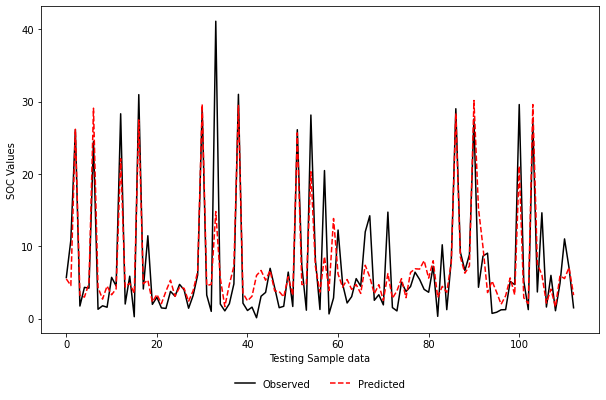

In [47]:
#plotting results of observed/predicted sample data after dropping unnecessary columns defined by feature importance
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,6)
x_ax = range(len(x_test))

plt.plot(x_ax,y_test, label ="Observed", color = "k", linestyle = "-")
plt.plot(x_ax,y_predict, label ="Predicted", color = "r", linestyle = "--")
plt.ylabel("SOC Values")
plt.xlabel("Testing Sample data")
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = "lower center", ncol =2, frameon = False)
plt.show

C:\Users\y.Israfilbayov\Anaconda3\envs\thesis_env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


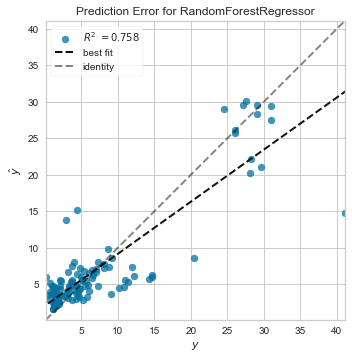

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [48]:
#Plotting the prediction errors

from yellowbrick.regressor import PredictionError

visualizer = PredictionError(regressor)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.poof()
# y axes predicted values   x axes the observed values

C:\Users\y.Israfilbayov\Anaconda3\envs\thesis_env\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


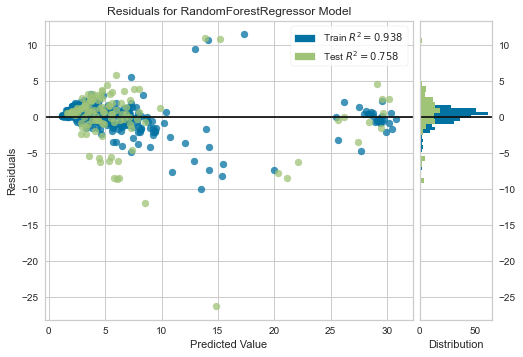

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [49]:
#Plotting the residuals
from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(regressor)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.poof()

In [50]:
#feature importance
feature_importances = pd.DataFrame(regressor.feature_importances_, index = x_train.columns,
                                   columns = ["importance"]).sort_values("importance", ascending = False)
feature_importances


,importance
clay1,0.697075
slp_stdev,0.059385
drain_pct,0.051835
ls_stdev,0.035442
rock1,0.023041
twi_median,0.016855
ls_median,0.014442
twi_stdev,0.014316
twi_mean,0.014122
tri_median,0.013327


In [51]:
import shap

# Fits the explainer
explainer = shap.Explainer(regressor.predict, x_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(x_test)

Permutation explainer: 114it [00:30,  2.98it/s]                                                                        


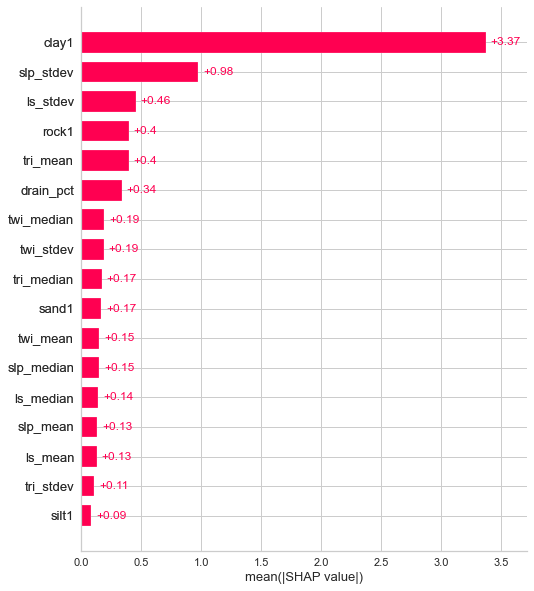

In [52]:
#Bar plot
shap.plots.bar(shap_values, max_display=22)

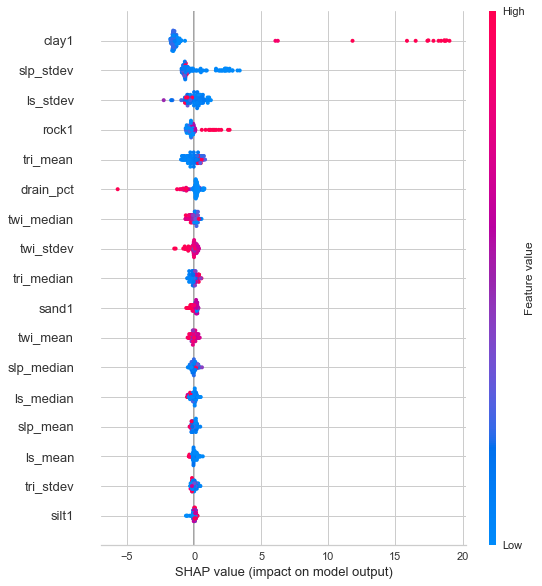

In [53]:
#Summary plot: beeswarm
shap.summary_plot(shap_values, max_display=22)

<h1>Preparing data for counting and plotting residuals<h1>

In [54]:
soc_sample_res = merged_data

In [57]:
col_soc_sample_res = soc_sample_res[[
    
"clay1",
"slp_stdev",
"drain_pct",
"ls_stdev",
"rock1",
"twi_median",
"ls_median",
"twi_stdev",
"twi_mean",
"tri_median",
"tri_mean",
"slp_mean",
"tri_stdev",
"ls_mean",
"slp_median",
"silt1",
"sand1"
    
]]

In [58]:
#making sure that neither categorical column left 
col_soc_sample_res.select_dtypes(include=["object"])

""
0
1
2
3
4
...
446
447
448
449


In [59]:
#checking null values
col_soc_sample_res.isnull().sum()

clay1         0
slp_stdev     0
drain_pct     0
ls_stdev      0
rock1         0
twi_median    0
ls_median     0
twi_stdev     0
twi_mean      0
tri_median    0
tri_mean      0
slp_mean      0
tri_stdev     0
ls_mean       0
slp_median    0
silt1         0
sand1         0
dtype: int64

In [60]:
# running model on final data
val = col_soc_sample_res.values

display(val.shape)
Prediction = regressor.predict(val)

soc_sample_res['SOC_pred'] = Prediction

display(soc_sample_res.sample(10))

(451, 17)

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


,orig_fid,est_soilty,wrb_main,est_txcode,nlayers,zmx,z1,est_txt1,lxtype1,sand1,silt1,clay1,rock1,k1,awc1,tri_mean,tri_stdev,tri_median,twi_mean,twi_stdev,twi_median,slp_mean,slp_stdev,slp_median,ls_mean,ls_stdev,ls_median,area_drain,drain_pct,area_arable,arable_pct,area_forest,forest_pct,area_grassland,grassland_pct,area_wetland,wetland_pct,area_urban,urban_pct,area_water,water_pct,area_other,other_pct,geometry,SOC_mean,SOC_pred
449,745510,TxR,HS,t₁150,1.0,1500.0,1500.0,t1,PEAT,25,25,50,0,5.09,0.198958,0.080676,0.060444,0.060962,9.054650,9.189554,1.019487,0.705289,0.484488,0.640792,0.074908,0.000000,0.111630,0.0,0.000,0.0,0.0,3.673347e+03,0.859362,0.000000,0.000000,423777.045537,99.140638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((513929.490 6497718.320, 513934.480 6...",31.071152,5.049622
291,419335,LG,PZ,pl130,1.0,1300.0,1300.0,pl,S,90,3,7,0,113.71,0.187308,0.078606,0.066049,0.052333,9.980002,10.036935,0.888902,0.935275,0.749884,0.771464,0.136667,0.111436,0.157476,0.0,0.000,0.0,0.0,2.259000e+05,99.804466,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,442.577744,0.195534,"POLYGON ((596712.240 6429663.070, 596716.600 6...",0.878000,3.918005
232,377804,Kr,RG,kb₄l,1.0,1000.0,1000.0,l,S,90,5,5,40,133.21,0.187778,0.097860,0.085605,0.056960,9.125292,9.176312,0.865676,1.278589,1.091774,0.916015,0.110254,0.105452,0.117471,0.0,0.000,0.0,0.0,2.807992e+04,99.583307,0.000000,0.000000,0.000000,0.000000,117.496693,0.416693,0.000000,0.000000,0.000000,0.000000,"POLYGON ((455196.350 6503240.860, 455191.190 6...",6.683101,5.447306
295,542455,LkIIg,RT,pl150,1.0,1500.0,1500.0,pl,S,90,3,7,0,113.71,0.181500,0.124661,0.072432,0.161592,9.038455,9.270376,1.182132,1.291309,0.709096,2.012874,0.140781,0.000000,0.401258,0.0,0.000,0.0,0.0,6.482627e+04,74.219238,5800.959305,6.641487,0.000000,0.000000,13881.251905,15.892569,0.000000,0.000000,2835.811845,3.246705,"POLYGON ((515138.250 6474622.180, 515153.180 6...",1.218000,4.072080
424,726642,R''',HS,t₁150,1.0,1500.0,1500.0,t1,PEAT,25,25,50,0,5.09,0.201154,0.046011,0.041342,0.024427,9.801231,9.806281,0.622253,0.470706,0.370688,0.376806,0.091896,0.063875,0.122468,0.0,0.000,0.0,0.0,1.806474e+04,1.932237,0.000000,0.000000,916848.381936,98.067763,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((622559.770 6516071.450, 622564.160 6...",28.580468,13.148401
280,400553,L(k)I,PZ,l,1.0,1000.0,1000.0,l,S,90,5,5,0,133.21,0.184444,0.248991,0.236963,0.094442,7.685815,7.602159,1.262556,3.592556,3.493985,1.532720,0.612328,0.571451,0.580755,0.0,0.000,0.0,0.0,2.182732e+04,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((622960.619 6435847.999, 622964.640 6...",2.699267,4.109238
230,377717,Kr,RG,kb₃sl/p,2.0,1000.0,500.0,sl,LS,82,9,9,25,37.54,0.186667,0.158100,0.129698,0.103206,8.930542,8.829784,1.186732,1.937745,1.599165,1.352401,0.190224,0.150961,0.202240,0.0,0.000,0.0,0.0,3.164062e+04,87.732068,1144.416692,3.173201,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3280.019743,9.094731,"POLYGON ((471812.770 6500532.210, 471821.460 6...",7.236993,5.457886
17,97876,GI,GL,sl,1.0,1000.0,1000.0,sl,LS,82,9,9,0,37.54,0.193000,0.122255,0.082237,0.110258,9.200469,9.262224,0.989310,1.170099,0.837095,0.991367,0.110467,0.069274,0.138376,0.0,0.000,0.0,0.0,6.541941e+04,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((686072.970 6578381.520, 686071.050 6...",2.098000,4.158450
273,409793,L(k)IIg,PZ,l60-90/s,2.0,1000.0,750.0,l,S,90,5,5,0,133.21,0.184625,0.146596,0.122674,0.095950,8.903518,8.954126,1.133483,1.865613,1.573380,1.281589,0.219813,0.166491,0.279890,314550.0,100.000,0.0,0.0,3.145499e+05,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((683064.480 6415896.850, 683053.920 6...",4.292002,16.973748
31,131540,GI,GL,tls,1.0,1000.0,1000.0,tls,SiL,35,50,15,0,5.09,0.194106,0.054611,0.038031,

In [61]:
#calculating residuals
soc_sample_res['SOC_res'] = soc_sample_res['SOC_mean'] - soc_sample_res['SOC_pred']

In [62]:
soc_sample_res

,orig_fid,est_soilty,wrb_main,est_txcode,nlayers,zmx,z1,est_txt1,lxtype1,sand1,silt1,clay1,rock1,k1,awc1,tri_mean,tri_stdev,tri_median,twi_mean,twi_stdev,twi_median,slp_mean,slp_stdev,slp_median,ls_mean,ls_stdev,ls_median,area_drain,drain_pct,area_arable,arable_pct,area_forest,forest_pct,area_grassland,grassland_pct,area_wetland,wetland_pct,area_urban,urban_pct,area_water,water_pct,area_other,other_pct,geometry,SOC_mean,SOC_pred,SOC_res
0,22283,D,UM,l,1.0,1000.0,1000.0,l,S,90,5,5,0,133.21,0.181111,0.359436,0.310175,0.183058,8.377213,8.315854,1.766274,5.510215,4.677907,2.831961,1.533490,1.099277,1.602366,0.0,0.000,11451.209081,44.760985,14131.805235,55.239015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((661177.770 6433486.820, 661181.480 6...",1.056000,4.120307,-3.064307
1,45116,Dg,UM,sl,1.0,1000.0,1000.0,sl,LS,82,9,9,0,37.54,0.191667,0.484878,0.413770,0.261519,5.741060,5.743954,1.319859,7.120438,6.196542,3.991416,0.619777,0.000000,1.075023,0.0,0.000,0.000000,0.000000,1948.785206,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((593740.830 6457498.410, 593746.860 6...",5.339205,4.133471,1.205734
2,86756,E2o,RG,v⁰₁ls,1.0,1000.0,1000.0,ls,L,55,30,15,6,9.04,0.185333,0.183304,0.157847,0.122353,7.696102,7.707587,1.173156,2.672886,2.252679,1.876179,0.359091,0.170924,0.499630,13859.0,22.340,50969.620733,82.160218,7505.976949,12.099221,0.000000,0.000000,0.000000,0.000000,3034.647721,4.891685,0.000000,0.000000,526.615939,0.848876,"POLYGON ((644349.090 6425785.630, 644332.670 6...",1.000000,5.651473,-4.651473
3,94817,Gh',LP,r₃sl,1.0,1000.0,1000.0,sl,LS,82,9,9,25,37.54,0.188772,0.073077,0.053873,0.070910,10.041866,10.147023,1.085769,0.887141,0.576140,1.027932,0.116577,0.082870,0.160359,0.0,0.000,1827.544454,0.515653,199448.969757,56.275738,2457.748481,0.693469,0.000000,0.000000,127.390969,0.035944,939.938384,0.265209,149612.185454,42.213987,"POLYGON ((376590.370 6468374.040, 376597.570 6...",4.029763,4.925120,-0.895357
4,94981,Gh'',LP,ls₁15-20/p,2.0,1000.0,175.0,ls1,SL,65,20,15,0,11.02,0.193810,0.047223,0.041661,0.027164,10.475562,10.442280,0.724699,0.504170,0.413480,0.367354,0.100211,0.095336,0.093697,0.0,0.000,0.000000,0.000000,46768.228963,96.923766,431.725768,0.894720,384.326570,0.796489,0.000000,0.000000,668.310367,1.385025,0.000000,0.000000,"POLYGON ((454414.190 6502937.640, 454410.570 6...",8.828158,6.611122,2.217036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,743897,S''',HS,t₃40/t₂110,2.0,1500.0,400.0,t3,PEAT,15,15,70,0,9.20,0.193909,0.052964,0.036711,0.059247,10.517005,10.608696,0.873531,0.568625,0.347202,0.653592,0.153226,0.095832,0.176322,40814.0,3.583,0.000000,0.000000,918850.772236,80.665677,0.000000,0.000000,220234.401899,19.334323,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"POLYGON ((487590.680 6496082.790, 487638.330 6...",27.842227,5.423233,22.418995
447,745489,TxR,HS,t₁150,1.0,1500.0,1500.0,t1,PEAT,25,25,50,0,5.09,0.197632,0.166695,0.127184,0.150620,8.320608,8.384425,1.263991,1.878402,1.363959,1.839783,0.130470,0.058343,0.206721,0.0,0.000,0.000000,0.000000,2749.589735,0.488021,0.000000,0.000000,550917.153321,97.781608,0.000000,0.000000,8776.568721,1.557742,972.616247,0.172628,"POLYGON ((659742.430 6422637.800, 659744.470 6...",32.381090,4.419991,27.961100
448,745507,TxR,HS,t₁150,1.0,1500.0,1500.0,t1,PEAT,25,25,50,0,5.09,0.198070,0.103842,0.077231,0.101754,9.166662,9.235750,1.098224,1.081146,0.776170,1.192861,0.081194,0.000000,0.185749,0.0,0.000,0.000000,0.000000,15893.860211,2.540230,0.000000,0.000000,602844.653179,96.349406,0.000000,0.000000,331.679532,0.053011,6615.715479,1.057354,"POLYGON ((522212.930 6495809.890, 522216.280 6...",30.951276,4.944207,26.007069
449,745510,TxR,HS,t₁150,1.0,1500.0,1500.0,t1,PEAT,25,25,50,0,5.09,0.198958,0.080676,

In [63]:
soc_sample_res.to_file(r'final_residuals\soc_residuals_base_withSameColumns.shp', driver='ESRI Shapefile')

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.


<h1>Executing Model on final Dataset<h1>

In [64]:
#preprocessing of the final data
estsoil = processed_data

In [65]:
estsoil.dtypes
estsoil.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 737391 entries, 1 to 745431
Data columns (total 44 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   orig_fid        737391 non-null  int64   
 1   est_soilty      737391 non-null  object  
 2   wrb_main        737391 non-null  object  
 3   est_txcode      737391 non-null  object  
 4   nlayers         737391 non-null  float64 
 5   zmx             737391 non-null  float64 
 6   z1              737391 non-null  float64 
 7   est_txt1        737391 non-null  object  
 8   lxtype1         737391 non-null  object  
 9   sand1           737391 non-null  int64   
 10  silt1           737391 non-null  int64   
 11  clay1           737391 non-null  int64   
 12  rock1           737391 non-null  int64   
 13  k1              737391 non-null  float64 
 14  awc1            737391 non-null  float64 
 15  tri_mean        737391 non-null  float64 
 16  tri_stdev       737391 non-nul

In [67]:

estsoil_ml = estsoil[[
    
"clay1",
"slp_stdev",
"drain_pct",
"ls_stdev",
"rock1",
"twi_median",
"ls_median",
"twi_stdev",
"twi_mean",
"tri_median",
"tri_mean",
"slp_mean",
"tri_stdev",
"ls_mean",
"slp_median",
"silt1",
"sand1"
]]



In [68]:
#analyzing "object" type columns
estsoil_ml.select_dtypes(include=["object"])

""
1
2
3
4
5
...
745427
745428
745429
745430


In [69]:
#checking null values
estsoil_ml.isnull().sum()

clay1         0
slp_stdev     0
drain_pct     0
ls_stdev      0
rock1         0
twi_median    0
ls_median     0
twi_stdev     0
twi_mean      0
tri_median    0
tri_mean      0
slp_mean      0
tri_stdev     0
ls_mean       0
slp_median    0
silt1         0
sand1         0
dtype: int64

In [70]:
estsoil_ml.shape

(737391, 17)

In [71]:
# running model on final data
values = estsoil_ml.values

display(values.shape)
Prediction = regressor.predict(values)

estsoil['SOC_pred'] = Prediction

display(estsoil.sample(10))

(737391, 17)

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,orig_fid,est_soilty,wrb_main,est_txcode,nlayers,zmx,z1,est_txt1,lxtype1,sand1,silt1,clay1,rock1,k1,awc1,tri_mean,tri_stdev,tri_median,twi_mean,twi_stdev,twi_median,slp_mean,slp_stdev,slp_median,ls_mean,ls_stdev,ls_median,area_drain,drain_pct,area_arable,arable_pct,area_forest,forest_pct,area_grassland,grassland_pct,area_wetland,wetland_pct,area_urban,urban_pct,area_water,water_pct,area_other,other_pct,geometry,SOC_pred
737505,737499,S''',HS,t₁100-150,1.0,1250.0,1250.0,t1,PEAT,25,25,50,0,5.09,0.192500,0.063739,0.056609,0.034404,9.522445,9.486082,0.621144,0.603334,0.506121,0.407933,0.102070,0.077079,0.119589,0.0,0.0,0.000000,0.000000,211262.705153,56.118669,0.000000,0.000000,165194.381800,43.881331,0.000000,0.000000,0.0,0.0,0.000000,0.000000,"POLYGON ((700611.370 6455747.410, 700727.310 6...",4.654065
316142,316141,Kk,LP,kb₅sl,1.0,1000.0,1000.0,sl,LS,82,9,9,60,37.54,0.182407,0.070848,0.063750,0.038103,9.988986,9.963599,0.777398,0.963498,0.891210,0.536353,0.122795,0.118597,0.120828,0.0,0.0,77403.572259,76.263572,3605.838501,3.552732,18355.084963,18.084751,0.000000,0.000000,2094.227629,2.063384,0.0,0.0,36.093497,0.035562,"POLYGON ((377925.210 6464330.350, 377912.620 6...",5.590936
84080,75795,E2k,RG,v₁ls,1.0,1000.0,1000.0,ls,L,55,30,15,6,9.04,0.186667,0.191245,0.193016,0.091007,7.719411,7.604532,1.139477,2.877431,2.871915,1.454987,0.299008,0.122207,0.373613,0.0,0.0,0.000000,0.000000,3710.197593,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,"POLYGON ((652259.130 6450337.200, 652254.228 6...",5.820823
556716,556713,LP,UM,sl/ls₁,2.0,1000.0,500.0,sl,LS,82,9,9,0,37.54,0.200000,0.200240,0.121170,0.202151,8.167465,8.227583,1.186552,2.010105,1.445724,1.964492,0.113571,0.000000,0.151625,0.0,0.0,0.000000,0.000000,6459.203741,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,"POLYGON ((584381.028 6475225.199, 584370.760 6...",4.083106
261852,261845,Kh''g,LP,r₂ls₁20-30/p,2.0,1000.0,250.0,ls1,SL,65,20,15,15,11.02,0.193333,0.070697,0.050960,0.076131,10.225908,10.321276,0.945468,0.881307,0.642052,0.991073,0.127178,0.102310,0.149563,0.0,0.0,66056.046504,16.945985,127122.644458,32.611980,178698.994197,45.843351,565.498725,0.145073,15683.043672,4.023320,0.0,0.0,1705.620206,0.437559,"POLYGON ((657678.390 6596395.300, 657656.440 6...",5.592949
393648,393651,Kr,RG,r₂ls₁25/r₄ls₁,2.0,1000.0,250.0,ls1,SL,65,20,15,15,11.02,0.200000,0.225125,0.181700,0.173464,8.339814,8.235615,2.263078,3.456819,2.892613,2.669839,0.539013,0.367150,0.606366,0.0,0.0,12058.802201,80.911120,1292.217698,8.670412,1552.743886,10.418468,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,"POLYGON ((622093.310 6569110.810, 622087.220 6...",5.214551
351675,351671,Kog,CM,ls₃40-70/s/p,3.0,1000.0,550.0,ls3,CL,50,15,35,0,3.67,0.187500,0.065854,0.060952,0.032276,10.048980,10.007222,0.753016,0.764313,0.688304,0.448815,0.094307,0.088292,0.096679,0.0,0.0,0.000000,0.000000,60275.499448,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,"POLYGON ((405328.619 6471603.418, 405328.340 6...",4.080643
37060,37055,Dg,UM,sl/ls,2.0,1000.0,500.0,sl,LS,82,9,9,0,37.54,0.191250,0.251928,0.247966,0.103718,8.334677,8.255025,1.178198,3.252008,3.307283,1.560068,0.375984,0.268213,0.437772,0.0,0.0,1685.534238,35.177790,3105.938508,64.822210,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,"POLYGON ((654995.971 6450671.500, 654996.820 6...",4.146454
35219,35214,Dg,UM,sl,1.0,1000.0,1000.0,sl,LS,82,9,9,0,37.54,0.192083,0.348452,0.328856,0.151926,7.407302,7.411342,1.389634,5.263562,4.926313,2.447358,1.021645,0.773436,1.071546,0.0,0.0,5326.849096,19.306774,19803.995129,71.778127,747.854023,2.710542,1711.872949,6.204558,0.000000,0.000000,0.0,0.0,0.000000,0.000000,"POLYGON ((640038.150 6459838.630, 640044.690 6...",4.417924
257487,257477,Kg,RG,r₂ls30-50/p,2.0,1000.0,400.0,ls,L,55,30,15,15,9.04,0.197500,0.057157,0.037579,0.069853,10.458094,10.561685,0.75

In [76]:
estsoil.to_file('data/soc_final_basemodel_reproduce.shp', encoding='utf-8')

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.


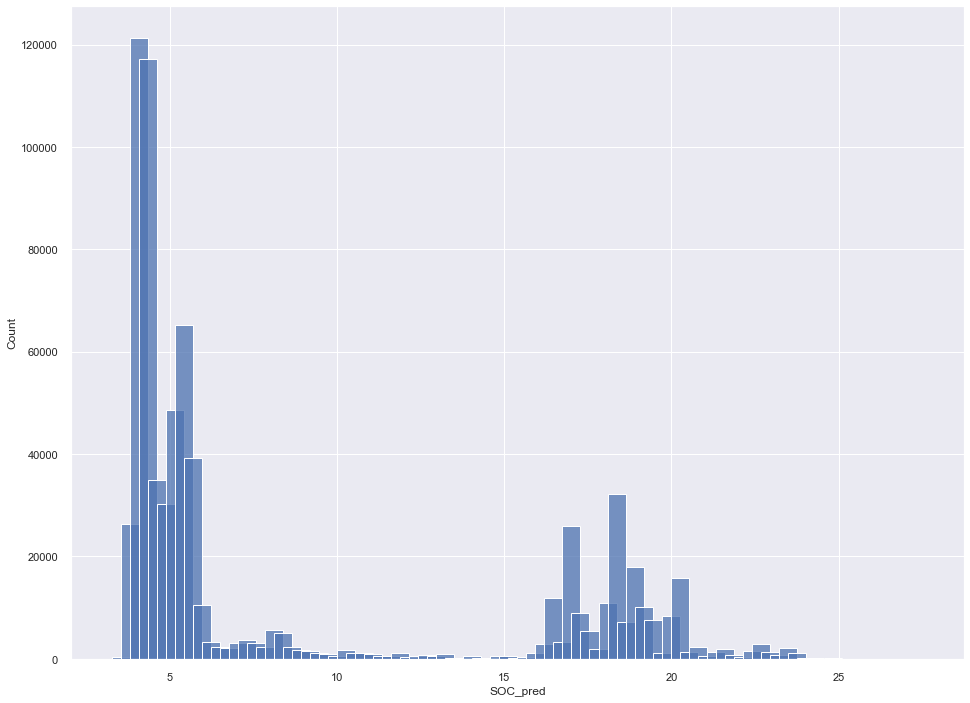

In [75]:
import seaborn as sns 
sns.histplot(x = "SOC_pred", data = estsoil, multiple ="stack", shrink =2) #element = step,poly
sns.set(rc={'figure.figsize':(13,12)})

In [73]:
estsoil["SOC_pred"].min()

3.392240095279792

In [74]:
estsoil["SOC_pred"].max()

27.393147873838938